<a href="https://www.kaggle.com/code/huseyincosgun/online-retail-eda-rfm-analysis?scriptVersionId=167305305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <b><span style='color:#F1C40F'> About |</span> Online Retail - II Dataset</b>
 
### <b><span style='color:#F1C40F'>Overview</span></b>
The Online Retail - II dataset provides insights into the sales activities of an online store spanning from December 1, 2009, to December 9, 2011. This dataset encompasses a wide range of souvenir products, primarily targeting corporate customers.

### <b><span style='color:#F1C40F'>Objective</span></b>
The primary objective of this dataset is to facilitate the development of customer-centric strategies through the integration of Customer Relationship Management (CRM) with Analytics. By leveraging RFM (Recency, Frequency, Monetary) Analysis, businesses can gain deeper insights into customer behavior and preferences.

### <b><span style='color:#F1C40F'>Key Questions Addressed</span></b>
1. **Recency:** How recent was a customer's latest purchase?
2. **Frequency:** How often does a customer make purchases?
3. **Monetary:** How much does a customer spend?
 
### <b><span style='color:#F1C40F'>Methodology</span></b>
1. **Calculating RFM Values:** Determine Recency, Frequency, and Monetary values for each customer.
2. **Segmentation:** Group customers based on RFM Scores to identify distinct segments.
3. **Personalization:** Tailor marketing strategies to address the needs and preferences of specific customer segments.

### <b><span style='color:#F1C40F'>Benefits</span></b>
- Enhanced understanding of customer behaviors and preferences.
- Targeted marketing campaigns leading to improved customer engagement.
- Deepened customer relationships through personalized interactions.

### <b><span style='color:#F1C40F'>Variables Description</span></b>
This section provides a detailed description of the variables included in the Online Retail - II dataset:

- **InvoiceNo:** Each transaction is uniquely identified by its invoice number. Invoice numbers prefixed with "C" denote refund transactions.
- **StockCode:** An exclusive code assigned to each item in the inventory.
- **Description:** The descriptive name of the item being purchased.
- **Quantity:** The quantity of items included in the transaction.
- **InvoiceDate:** Date and time when the purchase transaction occurred.
- **UnitPrice:** The price of a single item, denominated in Sterling currency.
- **CustomerID:** A unique identifier assigned to each customer.
- **Country:** The country of residence for the customer.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:120%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1)  Data Understanding</b></p>
</div>

In [1]:
# This code imports the pandas library as pd.
# It also imports the datetime library as dt and warnings library to filter warnings.
import pandas as pd
import datetime as dt
import warnings

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# Sets a filter to ignore warnings using the 'ignore' parameter.
warnings.filterwarnings('ignore')

# Configures some display options in the pandas library.
# Uses 'None' to show all columns and rows.
# Limits decimal numbers to three digits.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Reads an Excel file and assigns it to the variable df_.
# Assumes the file path is "/kaggle/input/online-retail-dataset/online_retail_II.xlsx" and reads the sheet named "Year 2009-2010".
df_ = pd.read_excel("/kaggle/input/online-retail-dataset/online_retail_II.xlsx", sheet_name="Year 2009-2010")

In [3]:
# Creates a copy of the dataframe df_ and assigns it to the variable df.
df = df_.copy()

# Displays the first 5 rows of the dataframe df.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [4]:
# Displays general information about the dataframe df, 
# including the data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key):
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum())) / len(dataset[key]) * 100, columns=['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(
        x=null_feat.index,
        y=null_feat['Count'],
        opacity=0.8,
        text=percentage_null['Count'],
        textposition='auto',
        marker=dict(
            color='#7EC0EE',  # Change the color of bars
            line=dict(
                color='#000000',
                width=1.5
            )
        ),
        width=0.5,  # Adjust the width of bars
    )

    layout = dict(title="Missing Values (count & %)", plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
                  xaxis=dict(title="Features"), yaxis=dict(title="Count"))

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


In [6]:
# Plotting 
missing_plot(df, 'Invoice')

In [7]:
#How many different unique products ?
df["Description"].nunique()

4681

In [8]:
# Get the top 10 most preferred products
most_preferred_products = df['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()


In [9]:
# Get the top 10 countries with the highest customer base
countries = df['Country'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()


The graphs above illustrate that the majority of customers are from the UK compared to other countries.

In [10]:
# Descending order of how many units of each product were purchased in total
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [11]:
# How many invoices have been issued ?
df["Invoice"].nunique()

28816

In [12]:
# Calculate the total cost per invoice.
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [13]:
# Descending order of how much was each invoice?
df.groupby("Invoice").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Invoice,
533027,49844.990
531516,45332.970
493819,44051.600
524181,33167.800
526934,26007.080


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:120%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2)  Data Preparation</b></p>
</div>

In [14]:
# Delete rows without customer ID. Because we will make an analysis over customers.
# We also delete product information with empty rows under 1%. 
# We aim to get healthy results in product-based analysis. 
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
missing_plot(df, 'Customer ID')

In [17]:
df.shape

(417534, 9)

In [18]:
# Canceled invoices start with the letter C. 
# The reason why the Quantity value is negative is that these refunded invoices are the sum of the refunded charges.
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,417534.000,12.759,-9360.000,2.000,4.000,12.000,19152.000,101.220
InvoiceDate,417534,2010-07-01 01:12:19.787609856,2009-12-01 07:45:00,2010-03-26 11:26:00,2010-07-08 19:12:00,2010-10-14 14:08:00,2010-12-09 20:01:00,NaN
Price,417534.000,3.888,0.000,1.250,1.950,3.750,25111.090,71.132
Customer ID,417534.000,15360.645,12346.000,13983.000,15311.000,16799.000,18287.000,1680.811
TotalPrice,417534.000,19.994,-25111.090,4.250,11.250,19.350,15818.400,99.916


In [19]:
df['Invoice'] = df['Invoice'].astype(str)
df_refunded = df[df['Invoice'].str.contains('C')]

df_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia,-35.400
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia,-9.900
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia,-17.000
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia,-12.600
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia,-35.400


In [20]:
# There are 9839 refunded records
df_refunded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 178 to 525282
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      9839 non-null   object        
 1   StockCode    9839 non-null   object        
 2   Description  9839 non-null   object        
 3   Quantity     9839 non-null   int64         
 4   InvoiceDate  9839 non-null   datetime64[ns]
 5   Price        9839 non-null   float64       
 6   Customer ID  9839 non-null   float64       
 7   Country      9839 non-null   object        
 8   TotalPrice   9839 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 768.7+ KB


In [21]:
# We continue by removing the refunded records. 
df = df[~df["Invoice"].str.contains("C", na = False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   TotalPrice   407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [22]:
# Check the total records
df.shape[0] + df_refunded.shape[0]

417534

In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,407695.000,13.587,1.000,2.000,5.000,12.000,19152.000,96.842
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.000,3.294,0.000,1.250,1.950,3.750,10953.500,34.757
Customer ID,407695.000,15368.504,12346.000,13997.000,15321.000,16812.000,18287.000,1679.796
TotalPrice,407695.000,21.663,0.000,4.950,11.900,19.500,15818.400,77.147


In [24]:
# Analyze the products with a sale price of 0 and remove these records as well.
# Boolean indexing
df_ZeroPrice = df[df['Price'] == 0]
df_ZeroPrice.shape

(31, 9)

In [25]:
df_ZeroPrice.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.000,16126.000,United Kingdom,0.000
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.000,15658.000,United Kingdom,0.000
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.000,17231.000,United Kingdom,0.000
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.000,14108.000,United Kingdom,0.000
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.000,14108.000,United Kingdom,0.000


In [26]:
df.drop(df[df['Price'] == 0.0].index, inplace=True)

In [27]:
# After 31 deleted records, there should be 407664 records.
df.shape

(407664, 9)

In [28]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:120%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3)  Extract meaningful insights</b></p>
</div>

In [29]:
# date, month, week, time
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'date', 'month', 'week', and 'time' columns
df['date'] = df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month'] = df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

In [30]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,date,month,week,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400,12/01/2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,12/01/2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,12/01/2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800,12/01/2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000,12/01/2009,December,Tuesday,07


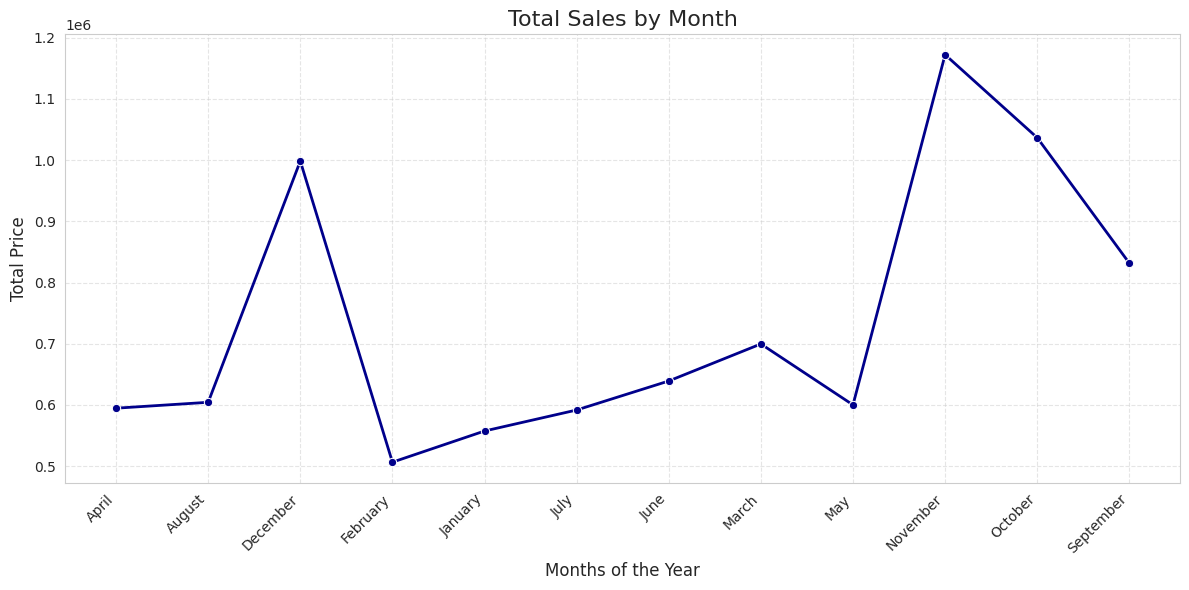

In [31]:
# Calculate the total sales by month
df_months = df.groupby('month').agg({'TotalPrice': 'sum'}).reset_index()

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='month', y='TotalPrice', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

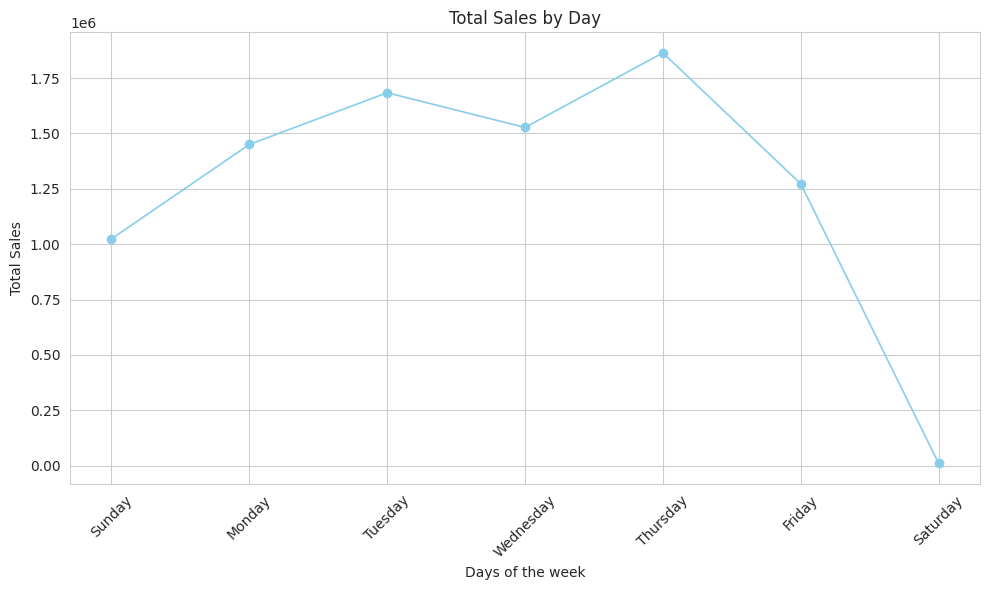

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame containing 'week' and 'Total_sales' columns

# Calculating total sales on a daily basis
daywise = df.groupby('week').agg({'TotalPrice': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['TotalPrice'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

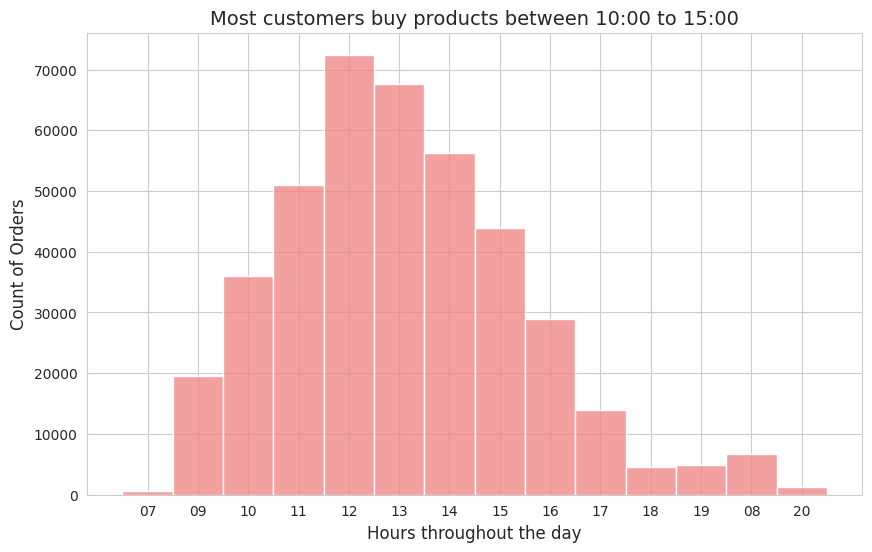

In [33]:
# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


#### <b><span style='color:#F1C40F'></span> During data preparation</b>

- Columns with missing values were identified. These records were deleted for user-based analysis.

- Canceled invoices(C374759) were found and removed for the health of the analysis.

- Records with a product sales price of 0.000 were deleted from the data set. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:120%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4)  Calculating RFM Metrics</b></p>
</div>

### What is RFM?

RFM is a method used to analyze and segment customer behaviors. RFM stands for Recency, Frequency, and Monetary Value.

- **Recency:** It refers to how recently a customer has made a purchase. More recent customers are considered more valuable.

- **Frequency:** It indicates how often a customer makes purchases within a given time frame. Customers who make frequent purchases are typically considered more loyal or engaged.

- **Monetary Value:** It represents the total value of purchases made by a customer within a specific time period. Customers who spend more money are generally more valuable to the business.

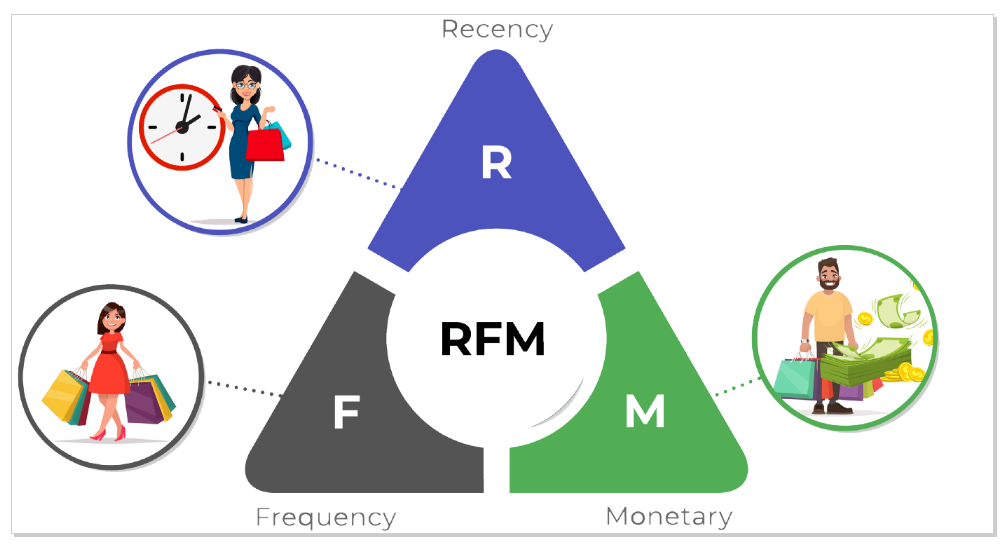

### How to Use?

RFM analysis is conducted by assigning scores or rankings to each customer based on these three metrics. Customers are then grouped into segments based on their RFM scores. These segments can be utilized to tailor marketing strategies and campaigns to better target and serve the needs of different customer groups.

For example, customers with high RFM scores (recent, frequent, high monetary value) might be offered loyalty programs or special incentives to encourage repeat purchases. On the other hand, customers with low RFM scores (low frequency, low monetary value) might be targeted with re-engagement campaigns to encourage them to make additional purchases.



In [34]:
# last transaction date
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [35]:
# Set a reference date for calculations
today_date = dt.datetime(2010, 12, 11)  

# Group by customer ID and aggregate metrics: recency (days since last purchase), 
# frequency (number of purchases), monetary (total spend)
df_rfm = df.groupby('Customer ID').agg(
        {'InvoiceDate': lambda date: (today_date - date.max()).days,
         'Invoice': lambda num: num.nunique(),
         'TotalPrice': lambda price: price.sum()})

In [36]:
df_rfm.columns = ['recency', 'frequency', "monetary"]  # Rename the aggregated columns
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.000,91.173,96.861,1.000,18.000,53.000,136.000,374.000
frequency,4312.000,4.456,8.170,1.000,1.000,2.000,5.000,205.000
monetary,4312.000,2048.238,8914.481,2.950,307.988,706.020,1723.142,349164.350


In [37]:
# Calculate recency score based on quantiles, assigning labels from 1 to 5 (1 being lowest recency)
df_rfm["recency_score"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346.000,165,11,372.860,2,5
12347.000,3,2,1323.320,5,2
12348.000,74,1,222.160,2,1
12349.000,43,3,2671.140,3,3
12351.000,11,1,300.930,5,1


In [38]:
# Combine recency and frequency scores to create RFM segment
df_rfm['segment'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,segment
Customer ID,,,,,,
12346.000,165,11,372.860,2,5,25
12347.000,3,2,1323.320,5,2,52
12348.000,74,1,222.160,2,1,21
12349.000,43,3,2671.140,3,3,33
12351.000,11,1,300.930,5,1,51


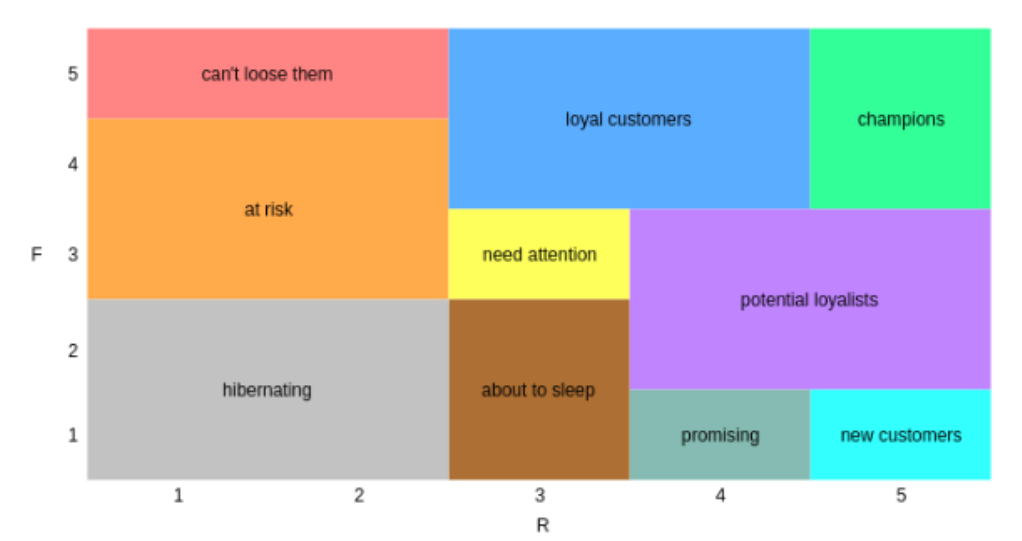


##### The RFM grid illustrated above represents a standard practice embraced by most businesses to define their customer base. Subsequently, it aids in the strategic planning of targeted campaigns aimed at engaging each segment effectively. By analyzing the recency, frequency, and monetary value of customer transactions, organizations gain valuable insights that enable them to tailor their marketing initiatives to the preferences and needs of distinct customer segments. This approach fosters enhanced customer engagement and loyalty, contributing to the overall success of the business.

In [39]:
# Mapping of segments to their corresponding customer segments
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

# Map RFM segments to corresponding customer segments using predefined seg_map
df_rfm['segment'] = df_rfm['segment'].replace(seg_map, regex=True)

# Keep only relevant columns and return the resulting dataframe
df_rfm = df_rfm[["recency", "frequency", "monetary", "segment"]]

df_rfm.index = df_rfm.index.astype(int)  # Convert index to integer
df_rfm.head()

,recency,frequency,monetary,segment
Customer ID,,,,
12346,165,11,372.860,cant_loose
12347,3,2,1323.320,potential_loyalists
12348,74,1,222.160,hibernating
12349,43,3,2671.140,need_attention
12351,11,1,300.930,new_customers


After calculating the RFM metrics, we proceed to segment the customers. But why do we do this? The purpose is to uncover insights into our customer base, addressing questions such as:

- Who are our most profitable customers?
- What aspects of our products or services do they value the most?
- Who are our new customers, and how do we engage them effectively?
- How can we attract new customers to our company?


The answers to these questions lie within segmentation. By segmenting our customers based on RFM scores, we gain a deeper understanding of their behavior and preferences.

With refined RFM segmentation, we can tailor our approach to each segment, addressing their unique needs and preferences more effectively.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:120%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5)  Detailed RFM segment analysis</b></p>
</div>

In [40]:
# Get the top 10 most preferred products
segments = df_rfm['segment'].value_counts()

# Create the bar plot
fig = px.bar(x=segments.index,
             y=segments.values,
             color=segments.index,
             text=segments.values,
             title="RFM Segments",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)

# Show the plot
fig.show()

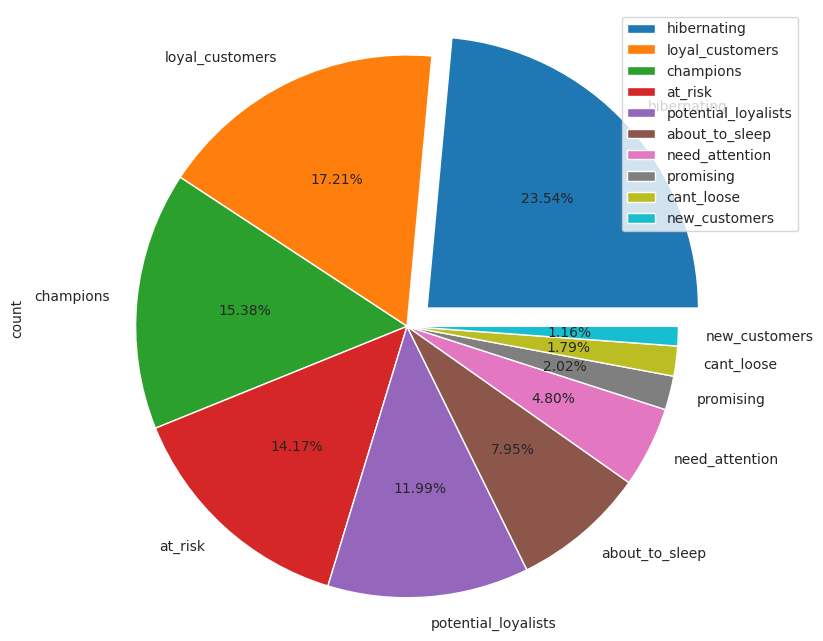

In [41]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segments.plot(kind = 'pie',
            color=segments.index,
            explode = explode,
            autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()

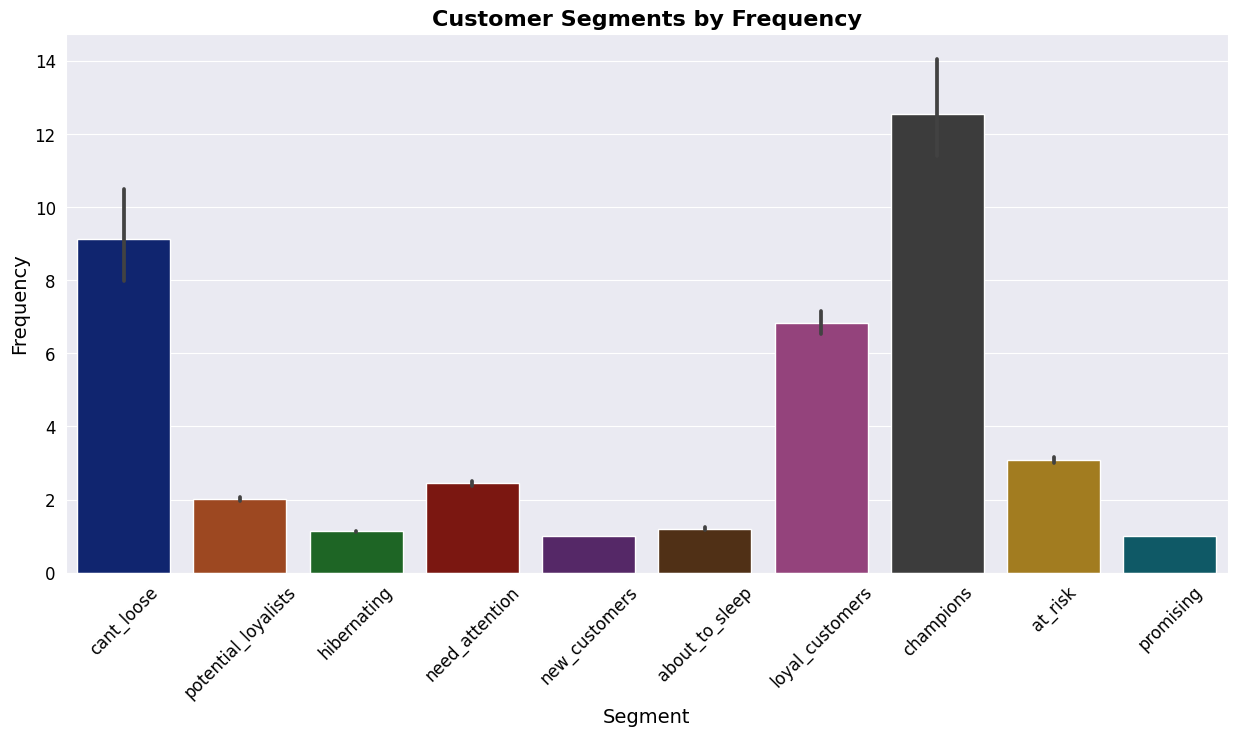

In [42]:
# Set style
sns.set_style("darkgrid")

# Set color palette
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x="segment", y="frequency", data=df_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [43]:
df_rfm[["segment","recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count","sum"])

recency               frequency             monetary  \
                       mean count     sum      mean count   sum     mean   
segment                                                                    
about_to_sleep       53.819   343   18460     1.201   343   412  441.320   
at_risk             152.159   611   92969     3.074   611  1878 1188.878   
cant_loose          124.117    77    9557     9.117    77   702 4099.450   
champions             7.119   663    4720    12.554   663  8323 6852.264   
hibernating         213.886  1015  217094     1.126  1015  1143  403.978   
loyal_customers      36.287   742   26925     6.830   742  5068 2746.067   
need_attention       53.266   207   11026     2.449   207   507 1060.357   
new_customers         8.580    50     429     1.000    50    50  386.199   
potential_loyalists  18.793   517    9716     2.017   517  1043  729.511   
promising            25.747    87    2240     1.000    87    87  367.087   

                                       
                    count         sum  
segment                                
about_to_sleep        343  151372.760  
at_risk               611  726404.651  
cant_loose             77  315657.650  
champions             663 4543051.143  
hibernating          1015  410037.504  
loyal_customers       742 2037581.976  
need_attention        207  219493.900  
new_customers          50   19309.960  
potential_loyalists   517  377157.180  
promising              87   31936.550

### <b><span style='color:#F1C40F'>Customer Segmentation Analysis and Recommendations</span></b>



### About to Sleep
- **Mean Recency:** 53.819 days (343 customers)
- **Mean Frequency:** 1.201 (412 purchases)
- **Mean Monetary Value:** $441.320 (Total: $151,372.760)

**Recommendations:**
- Offer loyalty rewards or VIP programs to further incentivize their frequent purchases.
- Provide exclusive offers or early access to new products/services to maintain their engagement.

### At Risk
- **Mean Recency:** 152.159 days (611 customers)
- **Mean Frequency:** 3.074 (1878 purchases)
- **Mean Monetary Value:** $1188.878 (Total: $726,404.651)

**Recommendations:**
- Implement targeted re-engagement campaigns to remind them of your value proposition.
- Offer personalized discounts or promotions to encourage repeat purchases.

### New Customers
- **Mean Recency:** 8.580 days (50 customers)
- **Mean Frequency:** 1.000 (50 purchases)
- **Mean Monetary Value:** $386.199 (Total: $19,309.960)

**Recommendations:**
- Welcome them with a special discount or promotion for their next purchase to encourage repeat business.
- Implement an onboarding email series to introduce them to your products/services.

### Potential Loyalists
- **Mean Recency:** 18.793 days (517 customers)
- **Mean Frequency:** 2.017 (1043 purchases)
- **Mean Monetary Value:** $729.511 (Total: $377,157.180)

**Recommendations:**
- Offer incentives for increasing their frequency of purchases, such as referral bonuses or points-based rewards.
- Provide personalized product recommendations based on their past purchases to enhance their shopping experience.

### Hibernating
- **Mean Recency:** 213.886 days (1015 customers)
- **Mean Frequency:** 1.126 (1143 purchases)
- **Mean Monetary Value:** $403.978 (Total: $410,037.504)

**Recommendations:**
- Reach out with personalized win-back offers or discounts to encourage them to return.
- Conduct surveys or feedback sessions to understand why they stopped purchasing and address any concerns.

These recommendations are tailored to each segment's behavior and value, aiming to optimize marketing strategies and improve customer retention and satisfaction.
